\begin{aligned}
\partial_t f^+ + \partial_x ((w+u_0)f^+) - \gamma \partial_w [(w-\delta u)f^+] &= \gamma^2 D \partial_w^2 f^+ - \alpha (f^+ - f^-), \\
\partial_t f^- - \partial_x ((w+u_0)f^-) - \gamma \partial_w [(w-\delta u)f^-] &= \gamma^2 D \partial_w^2 f^- + \alpha (f^+ - f^-).
\end{aligned}
$$

$$
\begin{aligned}
\partial_t f + \partial_x ((w+u_0) g) - \gamma \partial_w [(w-\delta u)f] &= \gamma^2 D\partial_w^2 f, \\
\partial_t g + \partial_x ((w+u_0) f) - \gamma \partial_w [(w-\delta u)g] &= \gamma^2 D\partial_w^2 g - 2\alpha g \\
\end{aligned}
$$

$$
\begin{aligned}
\partial_t \rho &= -\partial_x (g_1 + u_0 m), \\
\partial_t m &= -\partial_x (f_1 + u_0 \rho) - 2\alpha m
\end{aligned}
$$

$$
\begin{aligned}
\partial_t f_1 &= -\partial_x (g_2 + u_0 g_1) - \gamma (f_1 - \rho\delta u), \\
\partial_t g_1 &= -\partial_x (f_2 + u_0 f_1) - \gamma (g_1 - m\delta u ) - 2\alpha g_1,
\end{aligned}
$$

$$
\begin{aligned}
\partial_t f_2 &= -\partial_x (g_3 + u_0 g_2) - 2\gamma (f_2 - f_1 \delta u) + 2\gamma^2 D \rho, \\
\partial_t g_2 &= -\partial_x (f_3 + u_0 f_2) - 2\gamma (g_2 - g_1 \delta u) + 2\gamma^2 D m - 2 \alpha g_2
\end{aligned}
$$

For $\alpha=0$ case, 
$$
\begin{aligned}
\partial_t \rho &= -\partial_x (g_1 + u_0 m), \\
\partial_t m &= -\partial_x (f_1 + u_0 \rho), \\
\partial_t f_1 &= -\partial_x (\gamma D m + u g_1) - \gamma (f_1 - \rho\delta u), \\
\partial_t g_1 &= -\partial_x (\gamma D\rho + u f_1) - \gamma (g_1 - m\delta u )
\end{aligned}
$$

$$
M =\begin{pmatrix}
0 & 0 & -iq u_0 & -iq \\
\gamma \rho_0 u' & -\gamma & -iq \gamma D & -iq u_0 \\
-iq u_0& -iq & 0 & 0 \\
-iq \gamma D & -iq u_0 & 0 & -\gamma
\end{pmatrix}
$$

[-1.03575802-1.40604697j -1.03575802+1.40604697j  0.03575802-0.5450736j
  0.03575802+0.5450736j ]


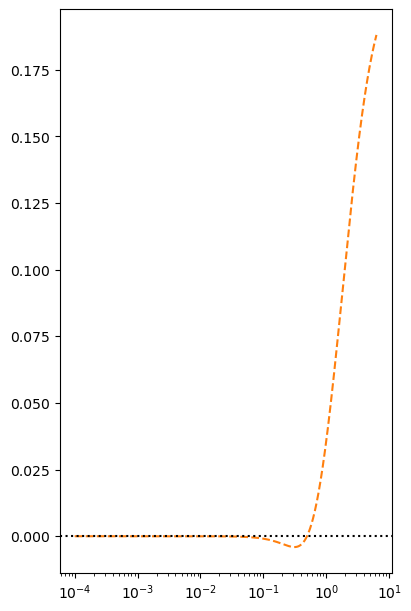

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import schur

class DMatrix2:
    def __init__(self, gamma, u_prime, D, u0=1, rho0=1):
        self.gamma = gamma
        self.u_prime = u_prime
        self.D = D
        self.u0 = u0
        self.rho0 = rho0

    def get_M(self, q):
        M = np.zeros((4, 4), complex)
        M[1, 0] = self.gamma * self.rho0 * self.u_prime
        # M[1, 0] = self.gamma * self.rho0 * self.u_prime - 0.5 * q**2 * self.u0 * self.D
        M[1, 1] = -self.gamma

        M[0, 2] = -1j * q * self.u0
        M[0, 3] = -1j * q
        M[1, 2] = -1j * q * self.gamma * self.D
        M[1, 3] = -1j * q * self.u0

        M[2, 0] = -1j * q * self.u0
        M[2, 1] = -1j * q
        M[3, 0] = -1j * q * self.gamma * self.D
        M[3, 1] = -1j * q * self.u0

        M[3, 3] = -self.gamma
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1], T[2, 2], T[3, 3]])
        return eigen_values
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real

gamma = 1
u_prime = -0.9
D = 0.1
rho0_plus = 0.5


M = DMatrix2(gamma, u_prime, D)
print(M.get_lambda(1))

q_arr = np.logspace(-4, np.log10(np.pi*2), 1000)
sigma = M.get_lambda_q(q_arr).max(axis=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), constrained_layout=True, sharex=True)
mask = np.abs(sigma.imag) < 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask])
mask = np.abs(sigma.imag) >= 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask], '--')
ax1.set_xscale("log")
# ax1.set_yscale("log")

ax1.axhline(0, c="k", linestyle=":")

plt.show()
plt.close()

\begin{aligned}
\partial_t f^+ + \partial_x (vf^+) - \gamma \partial_v [(v - u)f^+] &= \gamma^2 D \partial_v^2 f^+ - \alpha (f^+ - f^-), \\
\partial_t f^- - \partial_x (vf^-) - \gamma \partial_v [(v - u)f^-] &= \gamma^2 D \partial_v^2 f^- + \alpha (f^+ - f^-).
\end{aligned}
$$

$$
\begin{aligned}
\partial_t f + \partial_x (vg) - \gamma \partial_v [(v-u)f] &= \gamma^2 D\partial_v^2 f, \\
\partial_t g + \partial_x (vf) - \gamma \partial_v [(v-u)g] &= \gamma^2 D\partial_v^2 g - 2\alpha g \\
\end{aligned}
$$

$$
\begin{aligned}
\partial_t \rho &=  -\partial_x g_1,  \\
\partial_t m &= -\partial_x f_1, \\
\partial_t f_1 &= -\partial_x (\gamma Dm + u g_1) - \gamma (f_1 - u\rho),\\
\partial_t g_1 &= -\partial_x (\gamma D\rho + u f_1) - \gamma (g_1 - u m), \\
\end{aligned}
$$

$$
M =\begin{pmatrix}
0 & 0 & 0 & -iq \\
\gamma (u_0 +\rho_0 u') & -\gamma & -iq \gamma D & -iq u_0 \\
0& -iq & 0 & 0 \\
-iq (\gamma D + u_0 u'\rho_0) & -iq u_0 & \gamma u_0 & -\gamma
\end{pmatrix}
$$

[ 0.        +0.00000000e+00j -0.98979588-8.76532813e-19j
 -0.01020412+8.76532813e-19j -1.        +0.00000000e+00j]


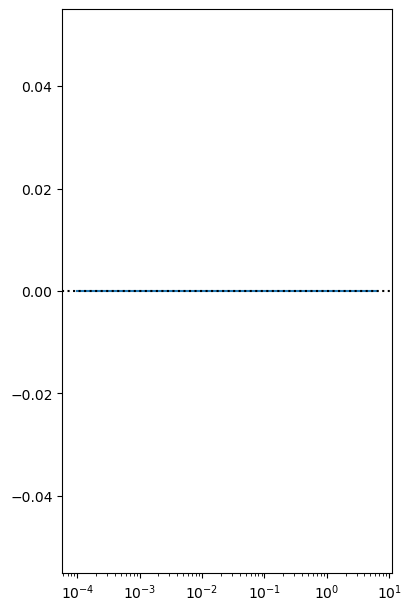

In [2]:
class DMatrix2:
    def __init__(self, gamma, u_prime, D, u0=1, rho0=1):
        self.gamma = gamma
        self.u_prime = u_prime
        self.D = D
        self.u0 = u0
        self.rho0 = rho0

    def get_M(self, q):
        M = np.zeros((4, 4), complex)
        M[1, 0] = self.gamma * (self.u0 + self.rho0 * self.u_prime)
        M[1, 1] = -self.gamma

        M[0, 2] = 0
        M[0, 3] = -1j * q
        M[1, 2] = -1j * q * self.gamma * self.D
        M[1, 3] = -1j * q * self.u0

        M[2, 0] = 0
        M[2, 1] = -1j * q
        M[3, 0] = -1j * q * (self.gamma * self.D + self.u0 * self.u_prime * self.D)
        M[3, 1] = -1j * q * self.u0

        M[3, 2] = self.gamma * self.u0
        M[3, 3] = -self.gamma
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1], T[2, 2], T[3, 3]])
        return eigen_values
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real

gamma = 1
u_prime = -1
D = 0.01
rho0_plus = 0.5


M = DMatrix2(gamma, u_prime, D)
print(M.get_lambda(0.1))

q_arr = np.logspace(-4, np.log10(np.pi*2), 1000)
sigma = M.get_lambda_q(q_arr).max(axis=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), constrained_layout=True, sharex=True)
mask = np.abs(sigma.imag) < 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask])
mask = np.abs(sigma.imag) >= 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask], '--')
ax1.set_xscale("log")
# ax1.set_yscale("log")

ax1.axhline(0, c="k", linestyle=":")

plt.show()
plt.close()

$$
M = \begin{pmatrix}
0 & -iq u_0 & 0 \\
-iq u_0 & -2 \alpha & -iq \\
\gamma \rho_0 u' & -iq \frac{\gamma^2 D}{\gamma+\alpha} & -\gamma
\end{pmatrix}
$$

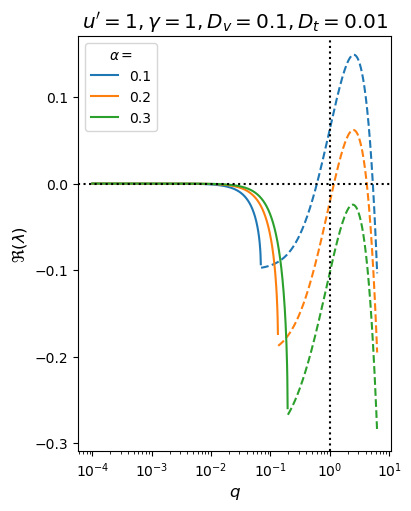

In [88]:
class DMatrix33:
    def __init__(self, gamma, u_prime, D, alpha, u0=1, rho0=1):
        self.gamma = gamma
        self.u_prime = u_prime
        self.D = D
        self.u0 = u0
        self.rho0 = rho0
        self.alpha = alpha

    def get_M(self, q):
        M = np.zeros((3, 3), complex)
        M[0, 1] = -1j * q * self.u0
        M[1, 0] = -1j * q * self.u0
        M[1, 1] = -2 * self.alpha
        M[1, 2] = -1j * q
        M[2, 0] = self.gamma * self.rho0 * self.u_prime
        # M[2, 1] = -1j * q * self.gamma **2 * self.D / (self.gamma + self.alpha)
        M[2, 1] = -1j * q * self.D / (self.gamma + self.alpha)

        M[2, 2] = -self.gamma
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1], T[2, 2]])
        return eigen_values
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real

gamma = 1
u_prime = 1
D = 0.1
alpha = 0.1
Dt = 0.01

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 5), constrained_layout=True, sharex=True)

for alpha in [0.1, 0.2, 0.3]:
    M = DMatrix33(gamma, u_prime, D, alpha)
    q_arr = np.logspace(-4, np.log10(np.pi*2), 1000)
    sigma = M.get_lambda_q(q_arr).max(axis=1) - q_arr **2 * Dt
    mask = np.abs(sigma.imag) < 1e-8
    line, = ax1.plot(q_arr[mask], sigma.real[mask], label="%g" % alpha)
    mask = np.abs(sigma.imag) >= 1e-8
    line, = ax1.plot(q_arr[mask], sigma.real[mask], '--', c=line.get_c())

ax1.set_xscale("log")
# ax1.set_yscale("log")
ax1.legend(title=r"$\alpha=$")

ax1.set_xlabel(r"$q$",fontsize="large")
ax1.set_ylabel(r"$\Re(\lambda)$",fontsize="large")

ax1.axhline(0, c="k", linestyle=":")
ax1.axvline(1, c="k", linestyle=":")
ax1.set_title(r"$u'=%g, \gamma=%g, D_v=%g, D_t=%g$" % (u_prime, gamma, D, Dt), fontsize="x-large")

plt.show()
plt.close()

# fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 5), constrained_layout=True, sharex=True)
# alpha = 0.1
# for gamma in [0, 1, 2, 3]:
#     M = DMatrix33(gamma, u_prime, D, alpha)
#     q_arr = np.logspace(-4, np.log10(np.pi*2), 1000)
#     sigma = M.get_lambda_q(q_arr).max(axis=1)
#     mask = np.abs(sigma.imag) < 1e-8
#     line, = ax1.plot(q_arr[mask], sigma.real[mask])
#     mask = np.abs(sigma.imag) >= 1e-8
#     line, = ax1.plot(q_arr[mask], sigma.real[mask], '--', c=line.get_c())

# ax1.set_xscale("log")
# # ax1.set_yscale("log")

# ax1.axhline(0, c="k", linestyle=":")
# ax1.axvline(1, c="k", linestyle=":")


# plt.show()
# plt.close()


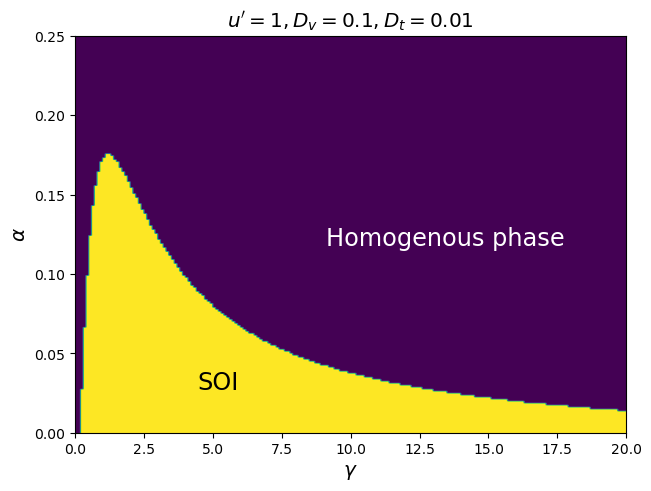

In [98]:
D = 0.1
Dt = 0.01
u_prime = 1

gamma_arr = np.linspace(0, 20, 200)
alpha_arr = np.linspace(0, 0.25, 200)[1:]
q_arr = np.logspace(-4, np.log10(1), 100)

lambda_mat = np.zeros((alpha_arr.size, gamma_arr.size))
for j, alpha in enumerate(alpha_arr):
    for i, gamma in enumerate(gamma_arr):
        M = DMatrix33(gamma, u_prime, D, alpha)
        # sigma = M.get_lambda_q(q_arr).max(axis=1) - Dt * q_arr ** 2
        sigma = M.get_lambda(1) - Dt
        if np.max(sigma.real) > 0:
            lambda_mat[j, i] = 1
extent=[gamma_arr[0], gamma_arr[-1], 0, alpha_arr[-1]]

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.imshow(lambda_mat, origin="lower", extent=extent, aspect="auto")
ax.set_xlabel(r"$\gamma$", fontsize="x-large")
ax.set_ylabel(r"$\alpha$", fontsize="x-large")
ax.set_title(r"$u'=%g, D_v=%g, D_t=%g$" % (u_prime, D, Dt), fontsize="x-large")
fig.text(0.3, 0.2, "SOI", fontsize="xx-large")
fig.text(0.5, 0.5, "Homogenous phase", fontsize="xx-large", c="w")

plt.show()
plt.close()